<a href="https://colab.research.google.com/github/munsejin/Study2/blob/master/DL004_%EB%AA%A8%EB%8D%B8%EC%A0%80%EC%9E%A5_%EB%B0%8F_%EC%9E%AC%EC%82%AC%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 모델 저장 및 재사용

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
sonar = pd.read_csv("/gdrive/My Drive/Colab Notebooks/인공지능강의안/data/sonar.csv", header=None)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

dataset = sonar.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]

# 레이블을 숫자로 변경
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 훈련 셋과 테스트 셋으로 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

# 모델 설정
model_sonar2 = Sequential()
model_sonar2.add(Dense(24,  input_dim=60, activation='relu'))
model_sonar2.add(Dense(10, activation='relu'))
model_sonar2.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model_sonar2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# 모델 실행
model_sonar2.fit(X_train, Y_train, epochs=130, batch_size=5, verbose=0)

Using TensorFlow backend.
W0716 00:19:54.131257 140494127847296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 00:19:54.133586 140494127847296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 00:19:54.146274 140494127847296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0716 00:19:54.196850 140494127847296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 00:19:54.384589 14049412

### 모델 저장

In [ ]:
model_sonar2.save("/gdrive/My Drive/Colab Notebooks/인공지능강의안/model/sonar_model.h5")

In [ ]:
# 메모리 내의 모델 삭제
del model_sonar2

### 모델 불러오기

In [ ]:
from keras.models import load_model

model_sonar2 = load_model("/gdrive/My Drive/Colab Notebooks/인공지능강의안/model/sonar_model.h5")

### 모델 평가하기

In [ ]:
model_sonar2.evaluate(X_test, Y_test)[1]

63/63 [==============================] - 0s 946us/step


0.8095237981705439

## 교차검증

### 데이터를 10개로 쪼갬

In [ ]:
from sklearn.model_selection import StratifiedKFold

n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

### 10개의 데이터에 대해 각각 모델을 적용

In [ ]:
accuracy = []

for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

    model.fit(X[train], Y[train], epochs=100, batch_size=5, verbose=0)
    k_accuracy = model.evaluate(X[test], Y[test])[1]
    accuracy.append(k_accuracy)

20/20 [==============================] - 0s 14ms/step


In [ ]:
accuracy

[0.8636363744735718,
 0.761904776096344,
 0.8095238208770752,
 0.9047619104385376,
 0.8095238208770752,
 0.761904776096344,
 0.9047619104385376,
 0.8500000238418579,
 0.75,
 0.8500000238418579]

In [ ]:
## 정확도 평균
np.average(accuracy)

0.8266017436981201

## 베스트 모델 만들기

### 와인 데이터 셋 로드 및 전처리

In [ ]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

df_pre = pd.read_csv('drive/My Drive/Colab Notebooks/인공지능강의안/data/wine.csv', header=None)

# sample() 함수를 사용하여 원본 데이터의 몇 %를 사용할지를 설정 (frac=1은 100%)
# frac=0.5라면 50%만 랜덤으로 불러옴.
df = df_pre.sample(frac=1)

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

### 모델 설정 및 실행

In [ ]:
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, epochs=200, batch_size=200, verbose=0)

W0716 00:21:56.845617 140494127847296 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### 모델 평가

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)
model.evaluate(X_test, Y_test)
# evaluate는 첫번째는 로스 두번째는 정확도를 반환

1950/1950 [==============================] - 0s 207us/step


[0.042337074637030944, 0.9907692304024329]

## 모델 업데이트하기

- epoch마다 모델의 정확도를 기록하면서 저장하기

In [ ]:
from keras.callbacks import ModelCheckpoint
import os

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 모델을 저장할 폴더
MODEL_DIR = '/gdrive/My Drive/Colab Notebooks/인공지능강의안/model/'

# 폴더가 없다면 폴더 생성
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [ ]:

# 저장할 파일명의 정규식을 설정 (epoch의수-손실값을 파일명으로 설정)
modelpath = MODEL_DIR + "{epoch:02d}-{val_loss:.4f}.hdf5"

# monitor=’val_loss : 모니터할 값을 설정 (val_loss : 테스트 오차, val_acc : 테스트셋 정확도, loss : 훈련 오차)
# verbose : 진행 내용 출력 여부 (1 : 출력)
# save_best_only=True : 이전에 저장한 모델보다 나은 경우에만 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 모델 실행 중에 콜백함수 checkpointer를 호출
model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.06470, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/01-0.0647.hdf5

Epoch 00002: val_loss improved from 0.06470 to 0.04880, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/02-0.0488.hdf5

Epoch 00003: val_loss did not improve from 0.04880

Epoch 00004: val_loss improved from 0.04880 to 0.04517, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/04-0.0452.hdf5

Epoch 00005: val_loss did not improve from 0.04517

Epoch 00006: val_loss improved from 0.04517 to 0.04223, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/06-0.0422.hdf5

Epoch 00007: val_loss did not improve from 0.04223

Epoch 00008: val_loss improved from 0.04223 to 0.03714, saving model to /gdrive/My Drive/Colab Notebooks/인공지능강의안/model/08-0.0371.hdf5

Epoch 00009: val_loss did not improve from 0.03714

Epoch 00010: val_loss did not improve from 0.03714

Epoch 00011: val_loss did not improve from 0.03714

Epoch 00012: val

In [ ]:
df_pre = pd.read_csv('drive/My Drive/Colab Notebooks/인공지능강의안/data/wine.csv', header=None)

### 그래프로 출력하기

In [ ]:
import matplotlib.pyplot as plt

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)



# 데이터 셋 중 15%만 불러옴
df = df_pre.sample(frac=0.15)

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = '/gdrive/My Drive/Colab Notebooks/인공지능강의안/model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

modelpath = MODEL_DIR + "{epoch:02d}-{val_loss:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# validation_split=0.33 : 33%만 테스트셋으로 사용
# epochs=3500 : 긴 학습 시간 예를 들기 위해 크게 잡음
# 실행 결과를 history에 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500, verbose=0)

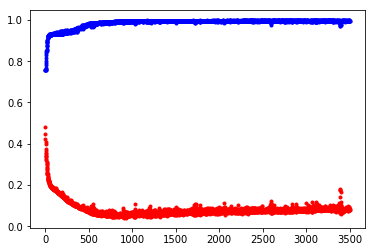

In [ ]:
# 오차값과 정확도를 불러옴
y_vloss=history.history['val_loss']
y_acc=history.history['acc']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

## 자동 학습 중단 (EarlyStopping)

- 테스트셋 오차가 줄지 않으면 학습을 멈추는 기능

In [ ]:
from keras.callbacks import EarlyStopping

# patience=100 : 에포크마다 테스트 오차가 좋지 않아도 기다릴 횟수를 100으로 설정
# 테스트 오차를 기준으로 중단 판단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

model.fit(X, Y, validation_split=0.2, epochs=2000, batch_size=500, callbacks=[early_stopping_callback])

print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Train on 780 samples, validate on 195 samples
Epoch 1/2000
780/780 [==============================] - 1s 2ms/step - loss: 0.5489 - acc: 0.7654 - val_loss: 0.4925 - val_acc: 0.7744
Epoch 2/2000
780/780 [==============================] - 0s 15us/step - loss: 0.4961 - acc: 0.7654 - val_loss: 0.4671 - val_acc: 0.7744
Epoch 3/2000
780/780 [==============================] - 0s 17us/step - loss: 0.4619 - acc: 0.7641 - val_loss: 0.4397 - val_acc: 0.7744
Epoch 4/2000
780/780 [==============================] - 0s 12us/step - loss: 0.4290 - acc: 0.7654 - val_loss: 0.4226 - val_acc: 0.7641
Epoch 5/2000
780/780 [==============================] - 0s 15us/step - loss: 0.4109 - acc: 0.7654 - val_loss: 0.4118 - val_acc: 0.7692
Epoch 6/2000
780/780 [==============================] - 0s 15us/step - loss: 0.3934 - acc: 0.7667 - val_loss: 0.3983 - val_acc: 0.7846
Epoch 7/2000
780/780 [==============================] - 0s 16us/step - loss: 0.3780 - acc: 0.7756 - val_loss: 0.3882 - val_acc: 0.7846
Epoch 8/20

In [ ]:
#@title 다중 분류

# 다중 분류

In [ ]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

df_pre = pd.read_csv('/gdrive/My Drive/Colab Notebooks/인공지능강의안/data/wine.csv', header=None)

df = df_pre.sample(frac=1)

dataset = df.values
X = dataset[:,0:11]
Y = dataset[:,11]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

e = LabelEncoder()
e.fit(Y)
Y = e.transform(Y)
Y_encoded = np_utils.to_categorical(Y)

In [ ]:
from keras.callbacks import ModelCheckpoint
import os

model = Sequential()
model.add(Dense(30,  input_dim=11, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X,Y_encoded, epochs=50, batch_size=1)

In [ ]:
model.evaluate(X,Y_encoded)

6497/6497 [==============================] - 1s 113us/step


[1.2739850489455076, 0.43650915807295676]

## 보스턴 집값 데이터셋을 이용한 선형 회귀

### 데이터 로드 및 훈련/테스트 셋 분리

In [ ]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

# delim_whitespace=True : 데이터 구분자가 빈 공백인 경우
house = pd.read_csv("/gdrive/My Drive/Colab Notebooks/인공지능강의안/data/housing.csv", delim_whitespace=True, header=None)

dataset = house.values
X = dataset[:,0:13]
Y = dataset[:,13]

# 테스트셋을 30% 사용
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)


In [ ]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
# 아무것도 안썼을 경우 기본 활성화함수로 항등함수가 설정(출력이 그대로 나옴)
model.add(Dense(1))

In [ ]:
# 모델 컴파일 및 실행
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, Y_train, epochs=200, batch_size=10, verbose=0)

In [ ]:
# predict() : 테스트 데이터 셋으로 출력을 예측
# flatten() : 다차원 데이터를 1차원 데이터로 변경  
Y_prediction = model.predict(X_test).flatten()

for i in range(10):
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(Y_test[i],  Y_prediction[i]))

실제가격: 22.600, 예상가격: 20.500
실제가격: 50.000, 예상가격: 26.415
실제가격: 23.000, 예상가격: 21.981
실제가격: 8.300, 예상가격: 12.533
실제가격: 21.200, 예상가격: 18.358
실제가격: 19.900, 예상가격: 21.984
실제가격: 20.600, 예상가격: 19.354
실제가격: 18.700, 예상가격: 24.155
실제가격: 16.100, 예상가격: 19.002
실제가격: 18.600, 예상가격: 13.196


In [ ]:
price_diff = []
# 실제 가격과 예상 가격 차이 계산
for i in range(10):
    price_diff.append(np.abs(Y_test[i] - Y_prediction[i]))


In [ ]:
price_diff

[2.0997978210449233,
 23.58519172668457,
 1.0188045501708984,
 4.232618522644042,
 2.8423397064208977,
 2.084104156494142,
 1.245980834960939,
 5.454735565185548,
 2.9024814605712876,
 5.403548812866212]

In [ ]:
np.average(price_diff)

5.086960315704346